# Animation: weather + air traffic

Airport: Dallas Fort Worth (KDFW / DFW)

Date: 24th May 2021, from 15:00 to 19:00

In [1]:
from traffic.data import opensky
from traffic.data import eurofirs
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
import cartopy.feature as cfeature
%matplotlib inline
opensky.username='thinhhoang'
opensky.password='iQ6^yrwe7o3m'
import cartes.crs as ccrs
from cartes.utils.features import countries
import pandas as pd
import numpy as np
import pygrib

projection = ccrs.LambertConformal(
    central_longitude = -97.5,
    central_latitude = 38.5,
    standard_parallels = (38.5,38.5),
    cutoff = 0) # this is the projection that is used to draw the map. For contiguous United States, use LambertConformal

/Users/thinhhoang/miniforge3/envs/traffic/lib/python3.9/site-packages/cartes/osm/requests.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
import pickle
def save_fl_data_to_pickle(fl, data: pd.DataFrame):
    if fl is not None:
        with open('openskyobject.pkl', 'wb') as f:
            pickle.dump(fl, f)
    if data is not None:
        data.to_csv('data.csv')

Change the use_local_db variable to True if one wishes to load the data from local storage, instead of downloading from OpenSky Database every single time. This helps speed up the data loading process.

Note: for first time run, consider setting it to True.

In [3]:
use_local_db = False

if not use_local_db:
    fl = opensky.history("2021-05-24 15:00", "2021-05-24 19:00", arrival_airport='KDFW')
    fl_data = fl.data
    save_fl_data_to_pickle(fl, fl_data)

Output()

/Users/thinhhoang/miniforge3/envs/traffic/lib/python3.9/site-packages/ipywidgets/widgets/widg
et_output.py:111: DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use
.get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/Users/thinhhoang/miniforge3/envs/traffic/lib/python3.9/site-packages/ipywidgets/widgets/widg
et_output.py:111: DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use
.get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/Users/thinhhoang/miniforge3/envs/traffic/lib/python3.9/site-packages/ipywidgets/widgets/widg
et_output.py:111: DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use
.get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/Users/thinhhoang/miniforge3/envs/traffic/lib/python3.9/site-packages/ipywidgets/widgets/widg
et_output.py:111: DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use
.get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/Users/thinhhoang/miniforge3/envs/traffic/lib/python3.9/site-packages/ipywidgets/widgets/widg
et_output.py:111: DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use
.get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/Users/thinhhoang/miniforge3/envs/traffic/lib/python3.9/site-packages/ipywidgets/widgets/widg
et_output.py:111: DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use
.get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/Users/thinhhoang/miniforge3/envs/traffic/lib/python3.9/site-packages/ipywidgets/widgets/widg
et_output.py:111: DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use
.get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/Users/thinhhoang/miniforge3/envs/traffic/lib/python3.9/site-packages/ipywidgets/widgets/widg
et_output.py:111: DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use
.get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/Users/thinhhoang/miniforge3/envs/traffic/lib/python3.9/site-packages/ipywidgets/widgets/widg
et_output.py:111: DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use
.get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/Users/thinhhoang/miniforge3/envs/traffic/lib/python3.9/site-packages/ipywidgets/widgets/widg
et_output.py:111: DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use
.get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/Users/thinhhoang/miniforge3/envs/traffic/lib/python3.9/site-packages/ipywidgets/widgets/widg
et_output.py:111: DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use
.get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/Users/thinhhoang/miniforge3/envs/traffic/lib/python3.9/site-packages/ipywidgets/widgets/widg
et_output.py:111: DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use
.get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/Users/thinhhoang/miniforge3/envs/traffic/lib/python3.9/site-packages/ipywidgets/widgets/widg
et_output.py:111: DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use
.get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

In [4]:
def get_lat_lon_at_time(min_time, t):
    current_time = min_time + pd.Timedelta(str(t) + ' second')
    df_current_time = fl_data[fl_data['timestamp']==current_time]
    return(np.array(df_current_time[['latitude', 'longitude']].values.tolist()))

In [5]:
def load_fl_data():
    with open('openskyobject.pkl', 'rb') as f:
        oso = pickle.load(f)
    return oso

if use_local_db:
    fl = load_fl_data()
    print('Data was successfully loaded from local storage')
    fl_data = fl.data

/Users/thinhhoang/miniforge3/envs/traffic/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/Users/thinhhoang/miniforge3/envs/traffic/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/Users/thinhhoang/miniforge3/envs/traffic/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  result = matplotlib.axe

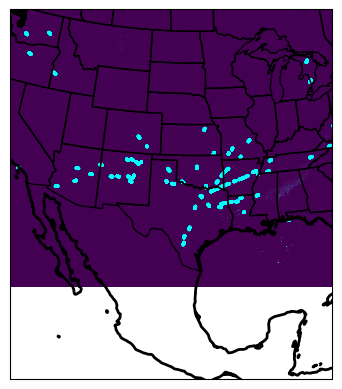

In [28]:
fig, ax = plt.subplots(subplot_kw=dict(projection=projection))
# Weather GRIB2
grbs = pygrib.open('hrrr.20141029-conus-hrrr.t00z.wrfnatf13.grib2') # 13th hour forecase from midnight i.e., 1PM
grb = grbs.select(name='Vertically-integrated liquid')[0]
grb_lat = grb.latlons()[0]
grb_lon = grb.latlons()[1]
grb_val = grb.values
min_time = fl_data['timestamp'].min() # first timestamp in the dataset
def render_frame(ti):
    with plt.style.context("traffic"):
        ax.clear()
        # coastlines of the US, and the state borders
        ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=2)
        ax.add_feature(cfeature.STATES.with_scale('50m'))
        ax.set_extent((-115, -85, 15, 50))
        # embed the VIL field
        # TODO: Automatically load grib depending on the time of the frame being rendered 
        ax.pcolormesh(grb_lon, grb_lat, grb_val, transform=ccrs.PlateCarree(), shading='nearest')
        # ax.gridlines(draw_labels=True) # turn this on for plotting grid lines
        # ax.spines["geo"].set_visible(False)
        for t in range(100):
            latlons = get_lat_lon_at_time(min_time, ti * 100 + t) # 100 secs between each frame 
            if latlons.shape[0] == 0:
                # We have an empty latlons to plot, perhaps there is absolutely no data at this current timestep
                continue
            if len(latlons.shape) !=2 :
                raise Exception('Invalid latlons shape')
            plt.scatter(x=latlons[:,1], y=latlons[:,0], c = t * np.ones((latlons.shape[0],)), transform=ccrs.PlateCarree(), s=2, cmap='cool')
        
        plt.draw()

anim = animation.FuncAnimation(fig, render_frame, 10)
writergif = animation.PillowWriter(fps=10)
anim.save("test.gif", writer=writergif)